# Face Dectector Comparizion

In [34]:
import cv2
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from imutils import  url_to_image, opencv2matplotlib

## 1. Load TensorFlow model

In [24]:
import tarfile

def extract_model(file_name, target_dir=TARGET_DIR):
    print('Extracting {} into {}'.format(file_name, target_dir))
    zip_ref = tarfile.TarFile.open( target_dir+file_name, 'r')
    zip_ref.close()
    return zip_ref

In [39]:
rfcn_file_name = 'rfcn_resnet101_widerface_91674.tar.gz' 
faster_rcnn_file_name = 'faster_rcnn_inception_resnet_v2_atrous_widerface_65705.tar.gz'
ssd_file_name = 'ssd_mobilenet_v1_widerface_106650.tar.gz'
# yolo_file_name = 'yolo-widerface-v2.tar.gz'
# tiny_yolo_file_name = 'tiny-yolo-widerface-v2.tar.gz'

TARGET_DIR = '../models/'
MIN_CONFIDENCE = 0.5

# should sepearate TODO
detection_graph = tf.Graph()

# rfcn_face_detector 
# faster_rcnn_face_detector
# ssd_face_detector
# yolo_face_detector

# rfcn_face_detector=extract_model(file_name=rfcn_file_name, target_dir=TARGET_DIR)

In [25]:
print(extract_model(rfcn_file_name))


Extracting rfcn_resnet101_widerface_91674.tar.gz into ../models/


#### 0) BaseTensorflowFaceDetector

In [28]:
def draw_face(self, img, face, color):
    # bbox face
    x, y, w, h = face
    label = self.name
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    label_size, base_line = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img, (x, y), (x + label_size[0], y + label_size[1] + base_line), color, cv2.FILLED)
    cv2.putText(img, label, (x, y + label_size[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))


def detect(image, include_score=True, draw_faces=True, color=(0, 255, 0), min_confidence=None):
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image, axis=0)
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

    # Each box represents a part of the image where a particular object was detected.
    boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    scores = detection_graph.get_tensor_by_name('detection_scores:0')
    classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')

    # Actual detection.
    (boxes, scores, classes, num_detections) = self.sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})

    boxes = np.squeeze(boxes)
    scores = np.squeeze(scores)
    faces = []
    im_height, im_width, _ = image.shape

    min_confidence = min_confidence if min_confidence is not None else self.min_confidence

    for i in range(boxes.shape[0]):
        if scores[i] >= self.min_confidence:
            ymin, xmin, ymax, xmax = tuple(boxes[i].tolist())
            (left, right, top, bottom) = (xmin * im_width, xmax * im_width, 
                                          ymin * im_height, ymax * im_height)

            x, y, w, h = int(left), int(top), int(right - left), int(bottom - top)
            if include_score:
                faces.append([x, y, w, h, scores[i]])
            else:
                faces.append([x, y, w, h])

            if draw_faces:
                draw_face(image, (x, y, w, h), color)

    return faces

### Display image

In [36]:
def display(img, figsize=(15,15)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(opencv2matplotlib(img))
    plt.show()

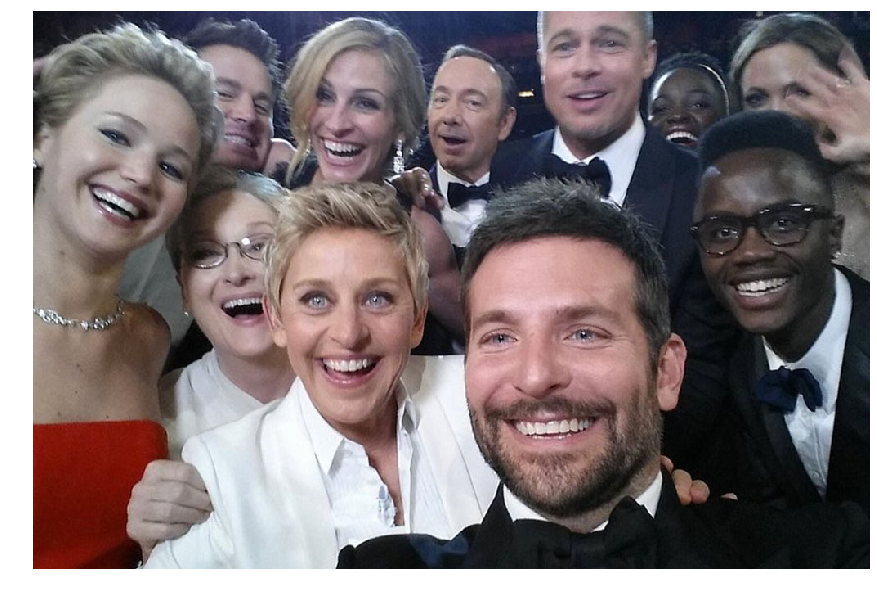

In [37]:
selfie = url_to_image('https://pmcfootwearnews.files.wordpress.com/2017/02/oscars-ellen-degeneres-selfie.jpg?w=1024')
display(selfie)

In [40]:
rfcn_face_detector = extract_model(rfcn_file_name)

detect(selfie, color=(255, 0, 0), min_confidence=0.8)
display(selfie)

Extracting rfcn_resnet101_widerface_91674.tar.gz into ../models/


KeyError: "The name 'image_tensor:0' refers to a Tensor which does not exist. The operation, 'image_tensor', does not exist in the graph."

#### 1) R-FCN resnet101

## 2. Calulate Time, mAP, ACC of TensorFlow model

## 3. Convert to TensorRT

## 4. Calculate Time, mAP, ACC of converted model